In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
dataset=pd.read_csv('time_series_2019-ncov-Confirmed.csv')
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.415,/61.371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,/61.679,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,/18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
dataset["Country/Region"].value_counts()

US           247
China         33
Canada        12
Australia      9
France         9
            ... 
Austria        1
Qatar          1
Latvia         1
Mexico         1
Syria          1
Name: Country/Region, Length: 171, dtype: int64

In [14]:
dataset = dataset.groupby(["Country/Region"]).sum()
dataset

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89
Algeria,0,0,0,0,0,0,0,0,0,0,...,26,37,48,54,60,74,87,90,139,201
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,0,1,6,10,15,23,33,43,43
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,2,10,17,33,36,42,42,70,70
Vietnam,0,2,2,2,2,2,2,2,2,2,...,47,53,56,61,66,75,85,91,94,113


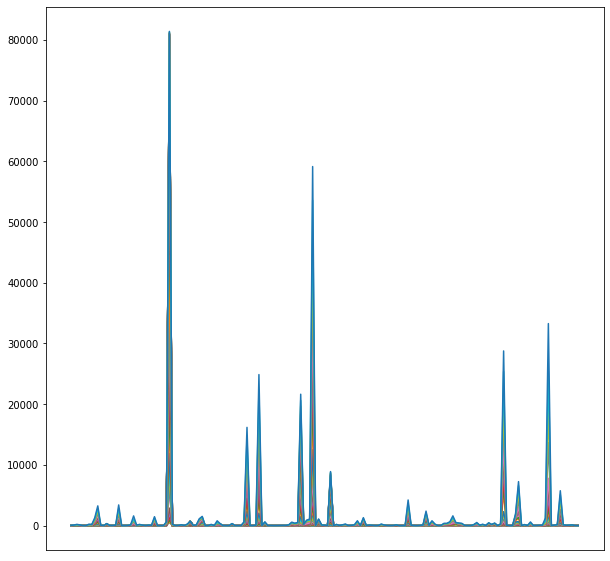

In [13]:
plt.plot(dataset)
plt.xticks([])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [15]:
//DF TO ARRAY
df = dataset.values
df

array([[  0,   0,   0, ...,  24,  24,  40],
       [  0,   0,   0, ...,  70,  76,  89],
       [  0,   0,   0, ...,  90, 139, 201],
       ...,
       [  0,   2,   2, ...,  91,  94, 113],
       [  0,   0,   0, ...,   2,   2,   3],
       [  0,   0,   0, ...,   1,   3,   3]], dtype=int64)

In [16]:
//Deleting columns in the array if 70% of the data in the column is 0

lst = []
for i in range(61):
    count = 0
    for j in range(171):
        if df[j,i] == 0:
            count+=1
    if count > 0.7*171:
        lst.append(i)
for i in lst:
    X = np.delete(df, np.s_[:i], 1)

In [17]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,1,1,1,1,1,1,1,1,1,...,7,11,16,21,22,22,22,24,24,40
1,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89
2,1,1,1,1,3,5,12,12,17,17,...,26,37,48,54,60,74,87,90,139,201
3,0,0,0,0,1,1,1,1,1,1,...,1,1,1,2,39,39,53,75,88,113
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,0,0,0,0,0,0,0,0,0,...,0,0,1,6,10,15,23,33,43,43
167,0,0,0,0,0,0,0,0,0,0,...,0,2,10,17,33,36,42,42,70,70
168,16,16,16,16,16,16,16,16,16,18,...,47,53,56,61,66,75,85,91,94,113
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,3


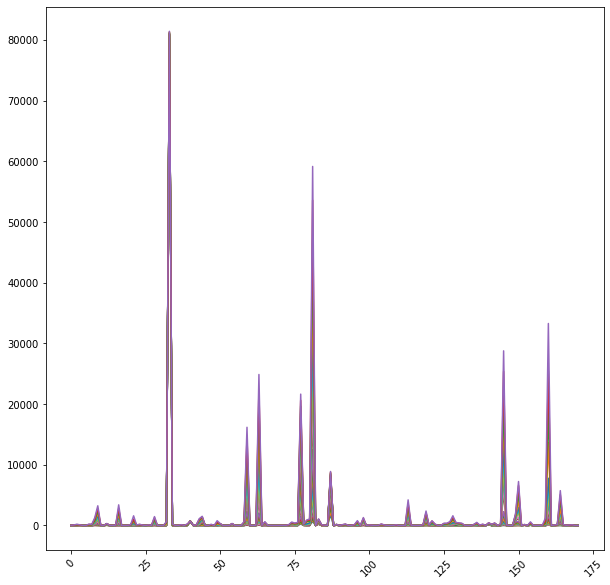

In [18]:
plt.plot(X)
plt.xticks(rotation = 45)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

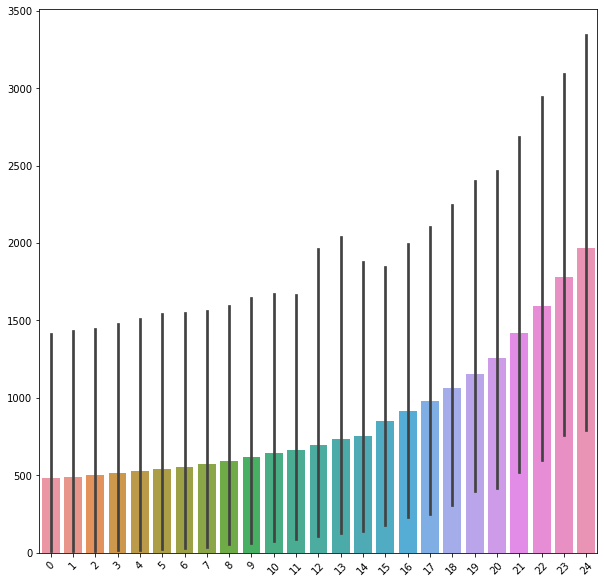

In [19]:
sns.barplot(data=X)
plt.xticks(rotation = 45)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()